# Basic visualization of 2d data

## Synopsis

- Import matplotlib.pyplot
- Contour and shade 2d data

In [1]:
import netCDF4
import numpy

## pyplot from matplotlib

Now let's visualize the data we now know how to read. We've already imported the netCDF4 package above. Now we will import pyplot which is a sub-package of matplotlib.

We could just import the package like this

In [2]:
import matplotlib.pyplot

but to use it is rather cumbersome

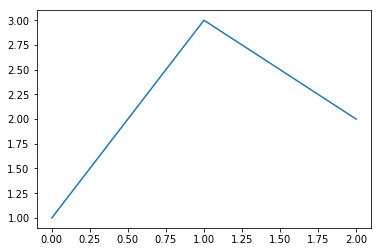

In [3]:
matplotlib.pyplot.plot([1,3,2]);

So we will import pyplot with an alias "plt" as follows:

In [4]:
import matplotlib.pyplot as plt

Here, plt is a shorthand for pyplot that _is widely used_ but you can use whatever alias you like.

Normally, we would put this import statement at the top of the notebook with the other imports.

Let's look at the 2005 World Ocean Atlas temperature data on a 5$^\circ$x5$^\circ$ grid, served from IRIDL:

In [5]:
nc = netCDF4.Dataset('http://iridl.ldeo.columbia.edu/SOURCES/.NOAA/.NODC/.WOA05/.Grid-5x5/.Annual/.mn/.temperature/dods')

And let's load the coordinates and sea-surface temperature into variables:

In [6]:
lon = nc.variables['X'][:]
lat = nc.variables['Y'][:]
sst = nc.variables['temperature'][0,:,:]

Note that the `[:]` forced the reading of the data. Leaving the `[:]` out would have returned an object and deferred reading of the data which is generally considered better form. Here, I chose to force read so that the data is not repeatedly fetch across the Internet connection.

There are two main ways of looking at 2D data.

1. Contours
   - `plt.contour()` Draw contours of constant values. Contours are colored by default.
   - `plt.contourf()` Draws bands of constant color between contours of constant value.
   
   Use `plt.clabel()` to label contours.
2. Psuedo-color shading of value at data locations.
   - `plt.pcolor()` Colored pixels for each data value.
   - `plt.pcolormesh()` is optimized for quadrilateral data and thus faster. It also understands curvilinear grids better than pcolor().
   
   Use `plt.colorbar()` to add a color bar.

Here are so variants using `plt.contour()`:

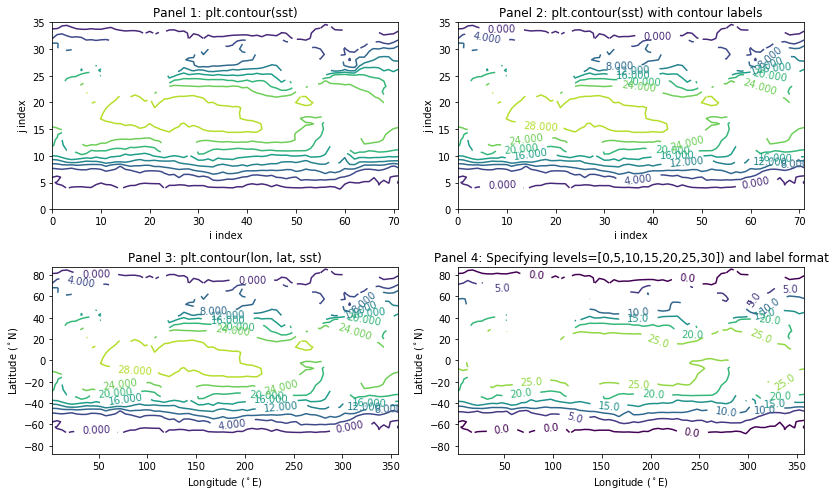

In [7]:
plt.figure(figsize=(12,7)); # Makes figure large enough to see four panels (optional)

# 1. Contour without coordinate value
plt.subplot(221);
plt.contour(sst);
plt.xlabel('i index');
plt.ylabel('j index');
plt.title('Panel 1: plt.contour(sst)');

# 2. As above but with contour labels
plt.subplot(222);
c = plt.contour(sst);
plt.clabel(c);
plt.xlabel('i index');
plt.ylabel('j index');
plt.title('Panel 2: plt.contour(sst) with contour labels');

# 3. Contour with coordinates
plt.subplot(223);
c = plt.contour(lon, lat, sst);
plt.clabel(c);
plt.xlabel('Longitude ($^\circ$E)');
plt.ylabel('Latitude ($^\circ$N)');
plt.title('Panel 3: plt.contour(lon, lat, sst)');

# 4. Contour with coordinates and specific contour levels
plt.subplot(224);
c = plt.contour(lon, lat, sst, levels=[0,5,10,15,20,25,30]);
plt.clabel(c, fmt='%.1f');
plt.xlabel('Longitude ($^\circ$E)');
plt.ylabel('Latitude ($^\circ$N)');
plt.title('Panel 4: Specifying levels=[0,5,10,15,20,25,30]) and label format');

plt.tight_layout()

And here are variants of `plt.pcolor()` and `plt.pcolormesh()`.

In the following examples you will not notice any difference between pcolor and pcolormesh but pcolormesh is the preferred method for i) efficiency and ii) flexibility with curvilinear grids.

__VERY IMPORTANT NOTE__: In panel 3 we pass the coordinates of the data to pcolormesh and you should __notice that the top row and right column of values are not plotted!!!__ This is because pcolormesh expects the coordinate of the mesh, or cell corners, which should have one extra column and row of values than does the data. In panel 3, I make up appropriate mesh coordinates using `numpy.linspace()`.

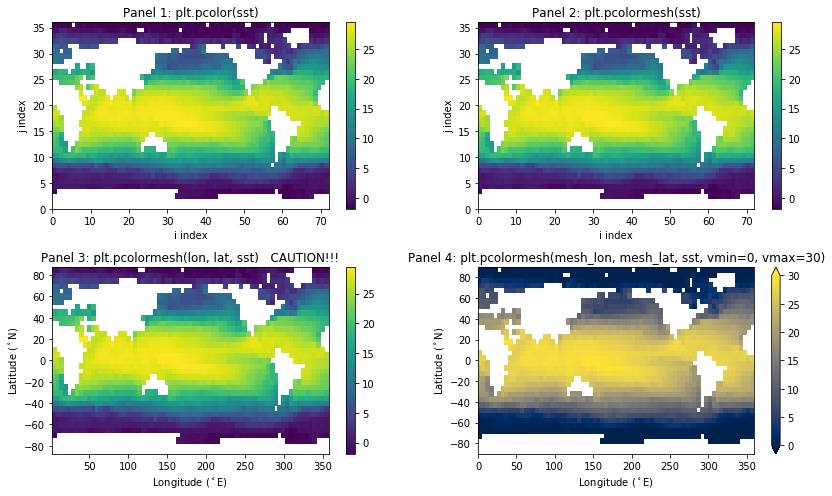

In [8]:
plt.figure(figsize=(12,7)); # Makes figure large enough to see four panels (optional)

# 1. Simple pcolor
plt.subplot(221);
plt.pcolor(sst);
plt.colorbar();
plt.xlabel('i index');
plt.ylabel('j index');
plt.title('Panel 1: plt.pcolor(sst)');

# 2. Simple pcolormesh
plt.subplot(222);
plt.pcolormesh(sst);
plt.colorbar();
plt.xlabel('i index');
plt.ylabel('j index');
plt.title('Panel 2: plt.pcolormesh(sst)');

# 3. pcolormesh with cell-centered coordinate value
plt.subplot(223);
plt.pcolormesh(lon, lat, sst);
plt.colorbar();
plt.xlabel('Longitude ($^\circ$E)');
plt.ylabel('Latitude ($^\circ$N)');
plt.title('Panel 3: plt.pcolormesh(lon, lat, sst)   CAUTION!!!');

# 4. pcolormesh with mesh coordinates value
plt.subplot(224);
mesh_lon = numpy.linspace(0,360,lon.shape[0]+1)
mesh_lat = numpy.linspace(-90,90,lat.shape[0]+1)
plt.pcolormesh(mesh_lon, mesh_lat, sst, vmin=0, vmax=30, cmap=plt.cm.cividis);
plt.colorbar(extend='both');
plt.xlabel('Longitude ($^\circ$E)');
plt.ylabel('Latitude ($^\circ$N)');
plt.title('Panel 4: plt.pcolormesh(mesh_lon, mesh_lat, sst, vmin=0, vmax=30)');

plt.tight_layout()

We can also combine pcolormesh and contour plots...

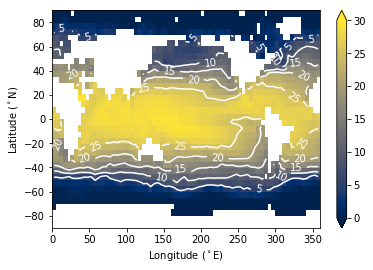

In [9]:
mesh_lon = numpy.linspace(0,360,lon.shape[0]+1)
mesh_lat = numpy.linspace(-90,90,lat.shape[0]+1)
plt.pcolormesh(mesh_lon, mesh_lat, sst, vmin=0, vmax=30, cmap=plt.cm.cividis);
plt.colorbar(extend='both');
c = plt.contour(lon, lat, sst, levels=[5,10,15,20,25], colors='w')
plt.clabel(c, fmt='%.0f')
plt.xlabel('Longitude ($^\circ$E)');
plt.ylabel('Latitude ($^\circ$N)');

## Summary

- Import matplotlib.pyplot with `import matplotlib.pyplot as plt`
- Contour with `plt.contour()` and `plt.contourf()`
- Shade with `plt.pcolormesh()`
- Also used `plt.colorbar()`, `plt.xlabel()`, `plt.ylabel()`, `plt.clabel()`